<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["Distributions","SpecialFunctions", "Plots", "Random","Statistics","Turing","FillArrays","StatsPlots"])

    Updating registry at `C:\Users\Rasel\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Rasel\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
using Plots, SpecialFunctions, Random

In [3]:
function sample_gaussian(μ,σ,n)
    return (μ .+ (σ .* sqrt(2) .* SpecialFunctions.erfinv(2 .* n .- 1)))
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
Random.seed!(12345)
n=rand(10000)

10000-element Vector{Float64}:
 0.7918054038647908
 0.1595789996994108
 0.33419142747606
 0.8113922657011057
 0.7966292033537833
 0.9178138221831842
 0.31132682723725014
 0.7529056805990061
 0.19990730668728796
 0.5411071027988436
 0.8462977195417882
 0.1651740535548888
 0.9029629954884405
 ⋮
 0.47634469598653006
 0.9908015523553383
 0.27463712682127017
 0.46735801891228224
 0.1615912722073961
 0.8540315141310069
 0.9303655799885863
 0.7720841030396772
 0.46123421245111984
 0.11536892703926471
 0.47297528994106364
 0.7319228178551349

In [11]:
sample=[]
for i=1:10000
push!(sample,sample_gaussian(-1,2,n[i]))
end

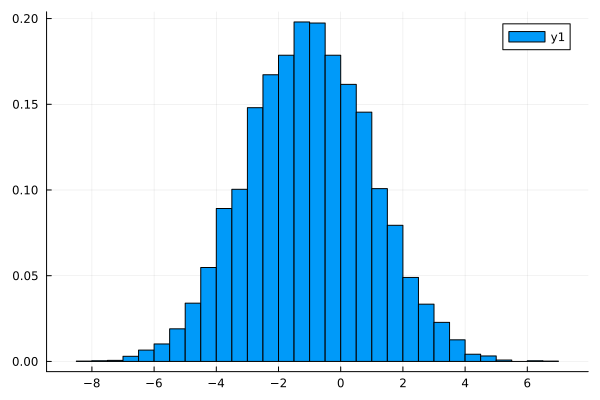

In [12]:
histogram(sample, bin=50, normalize=true)

In [13]:
import Distributions as di

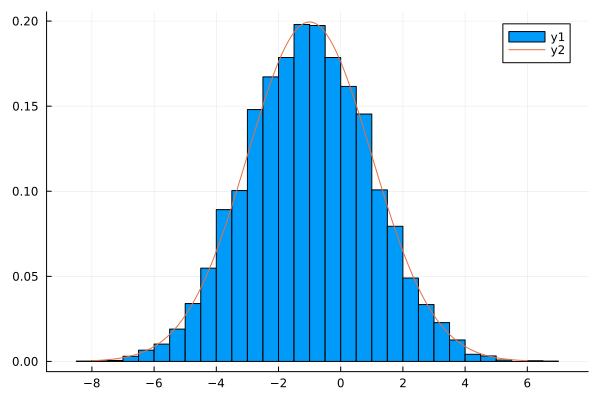

In [14]:
x=-8:0.001:6
G_d=di.Gaussian(-1,2)
plot!(x, di.pdf.(G_d,x))